In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
img=mpimg.imread('scale_1200.jpeg')

In [ ]:
img.shape

In [ ]:
# Это псевдокод!!

Y = 0.299*R + 0.587*G + 0.114*B
Cb = -0.1687*R - 0.3313*G + 0.5*B + 128
Cr = 0.5*R - 0.4187*G - 0.0813*B + 128

In [103]:
Y = 0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2]
Cb = -0.1687*img[:,:,0]- 0.3313*img[:,:,1]+0.5*img[:,:,2] +128
Cr = 0.5*img[:,:,0]- 0.4187*img[:,:,1]- 0.0813*img[:,:,2] +128

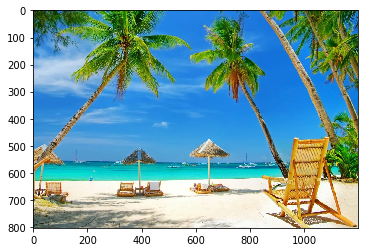

In [104]:
plt.imshow(img)

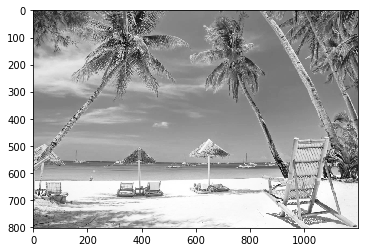

In [105]:
plt.imshow(255-(0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2]),cmap='Greys',interpolation='nearest')

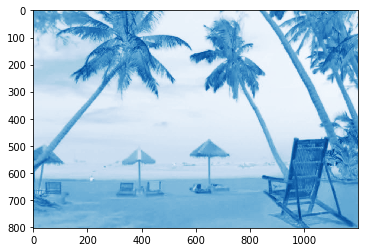

In [106]:
plt.imshow(255-(-0.1687*img[:,:,0]- 0.3313*img[:,:,1]+ 0.5*img[:,:,2]+128),cmap='Blues',interpolation='nearest')

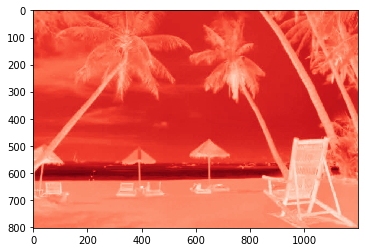

In [107]:
plt.imshow(255-(0.5*img[:,:,0]- 0.4187*img[:,:,1]- 0.0813*img[:,:,2]+128),cmap='Reds',interpolation='nearest')

In [108]:
blocks_y = img.shape[0]//8
blocks_x = img.shape[1]//8

In [109]:
# Реализация ДКП
def DKP(block):
    a = np.zeros([8,8])

    for k1 in range(8):
        for k2 in range(8):
            integral = 0
            for j in range(8):
                for l in range(8):
                    integral += 0.25*block[l][j]*np.cos(np.pi/8*(j+0.5)*k1)*np.cos(np.pi/8*(l+0.5)*k2)

            a[k1,k2] = integral

    a[0][0]=0.5*a[0][0]
    
    return a

In [110]:
# Матрица преобразования из rgb в ycbcr
ycbcr=np.array([[0.299, 0.587, 0.114],
               [-0.1687, -0.3313, 0.5],
               [0.5, -0.4187, -0.0813]])

# Стандартные матрицы квантованя для jpeg 50% качества
quant_y = [[16,  11,  10,  16,  24,  40,  51,  61],
    [12,  12,  14,  19,  26,  58,  60,  55],
    [14,  13,  16,  24,  40,  57,  69,  56],
    [14,  17,  22,  29,  51,  87,  80,  62],
    [18,  22,  37,  56,  68, 109, 103,  77],
    [24,  35,  55,  64,  81, 104, 113,  92],
    [49,  64,  78,  87, 103, 121, 120, 101],
    [72,  92,  95,  98, 112, 100, 103,  99]]

quant_c = [[17,  18,  24,  47,  99,  99,  99,  99],
    [18,  21,  26,  66,  99,  99,  99,  99],
    [24,  26,  56,  99,  99,  99,  99,  99],
    [47,  66,  99,  99,  99,  99,  99,  99],
    [99,  99,  99,  99,  99,  99,  99,  99],
    [99,  99,  99,  99,  99,  99,  99,  99],
    [99,  99,  99,  99,  99,  99,  99,  99],
    [99,  99,  99,  99,  99,  99,  99,  99]]


blocks = []
new_picture = np.zeros_like(img)

for x in range(blocks_x):
    for y in range(blocks_y):
        block = img[y*8:(y+1)*8,x*8:(x+1)*8,:]
        
        block_ycbcr = np.matmul(block,ycbcr) + [0,128,128]
        
        # Для эффективности сжатия, здесь нужно проредить в два раза (или в 4) компоненты Cb и Cr
        #
        #
        #
        
        block_dkp = np.zeros([8,8,3])
        ## ДКП!!!!
        block_dkp[:,:,0] = DKP(block_ycbcr[:,:,0])
        block_dkp[:,:,1] = DKP(block_ycbcr[:,:,1])
        block_dkp[:,:,2] = DKP(block_ycbcr[:,:,2])
        ## ДКП
        
        block_dkp[:,:,0] = np.round(block_dkp[:,:,0]/quant_y)
        block_dkp[:,:,1] = np.round(block_dkp[:,:,1]/quant_c)
        block_dkp[:,:,2] = np.round(block_dkp[:,:,2]/quant_c)
        
        # Блок обработан, сохраняем его
        blocks.append(block_dkp)
        
        break
# Все блоки обработаны теперь нужно для них составить таблицу Хаффмана
# huffman
# Все матрицы сохраняются кодом Хаффмана в зигзагообразном порядке
# После того как останутся одни нули, ставится специальный индикатор

In [115]:
block_dkp[:,:,0]

array([[ 29., -12.,  -2.,  -1.,   0.,   0.,  -0.,  -0.],
       [-15.,   6.,   2.,  -0.,   0.,  -0.,  -0.,  -0.],
       [ -1.,   5.,  -3.,  -1.,   0.,  -0.,  -0.,   0.],
       [  0.,  -1.,  -0.,   0.,   0.,   0.,  -0.,   0.],
       [ -1.,   1.,  -0.,  -1.,  -0.,   0.,  -0.,  -0.],
       [ -1.,  -1.,  -1.,  -1.,   0.,   0.,   0.,   0.],
       [ -1.,  -0.,  -0.,   0.,   0.,  -0.,   0.,   0.],
       [ -0.,  -0.,  -0.,   0.,  -0.,   0.,   0.,  -0.]])

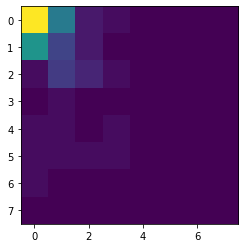

In [121]:
plt.imshow(np.abs(block_dkp[:,:,0]))

In [119]:
# Организуйте преобразование матрицы в строку в порядке Yeltsin walk

In [ ]:
# Далее применире энтропийное сжатие (архиватор, который вы разработали в предыдущей работе)